<a href="https://colab.research.google.com/github/lpaolariosm/Ecuaciones-Diferenciales-Parciales-I/blob/main/Ecuaci%C3%B3n_de_Onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:red;"> " Ecuación de Onda"</span>
<span style="color:orange;"></span>


La solución de la ecuación
$$\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}$$
$$
0≤x≤1=l
$$
sujeta a las condiciones de frontera:
$$f(0)=0 \quad f(1)=0$$
Y la condición inicial:
$$\frac{\partial}{\partial t}u(x,0) = 0$$

$$
f(x) =
\begin{cases}
\frac{2K}{l}x & \text{si } \quad 0 < x < \frac{l}{2} \\\\
\frac{2K}{l}(l - x) & \text{si } \quad \frac{l}{2} < x < l
\end{cases}
$$

$$
K = 1,\quad C = 1,\quad l = 1
$$
Esta dada en términos de la serie de Fourier por la expresión:
$$
u(x,t) = \sum_{n=1}^{\infty}
\frac{8k \sin\left( \frac{\pi n}{2} \right) \sin\left( \frac{\pi n x}{L} \right) \cos\left( \frac{\pi c n t}{L} \right)}{\pi^2 n^2}
$$

$$
u(x,t) = \sum_{n=1}^{\infty}
\frac{8 \sin\left( \frac{\pi n}{2} \right) \sin\left( \pi n x \right) \cos\left( \pi n t \right)}{\pi^2 n^2}
$$

<span style="color:orange;">Solucion de la ecuación de Onda</span>

In [1]:
import sympy as sp

Definimos las variables

In [2]:
x, t, n, k, L, c = sp.symbols('x t n k L c', real=True, positive=True)
pi = sp.pi

Aplicar condiciones

In [3]:
a_n = (8*k)/(n**2*pi**2) * sp.sin(n*pi/2)
# Término general de la serie de Fourier
term_n = a_n * sp.sin(n*pi*x/L) * sp.cos(n*pi*c*t/L)
# Sumatoria infinita simbólica

#para los parametros {k:1, L:1, c:1})
u_xt = sp.Sum(term_n, (n, 1, sp.oo))

sp.init_printing(use_latex='mathjax')
display(sp.Eq(sp.Function('u')(x,t), u_xt))
u_xt_subs = u_xt.subs({k:1, L:1, c:1})
display(sp.Eq(sp.Function('u')(x,t), u_xt_subs))

            ∞                                       
          _____                                     
          ╲                                         
           ╲           ⎛π⋅n⎞    ⎛π⋅n⋅x⎞    ⎛π⋅c⋅n⋅t⎞
            ╲   8⋅k⋅sin⎜───⎟⋅sin⎜─────⎟⋅cos⎜───────⎟
             ╲         ⎝ 2 ⎠    ⎝  L  ⎠    ⎝   L   ⎠
u(x, t) =    ╱  ────────────────────────────────────
            ╱                   2  2                
           ╱                   π ⋅n                 
          ╱                                         
          ‾‾‾‾‾                                     
          n = 1                                     

            ∞                                   
          _____                                 
          ╲                                     
           ╲         ⎛π⋅n⎞                      
            ╲   8⋅sin⎜───⎟⋅sin(π⋅n⋅x)⋅cos(π⋅n⋅t)
             ╲       ⎝ 2 ⎠                      
u(x, t) =    ╱  ────────────────────────────────
            ╱                 2  2              
           ╱                 π ⋅n               
          ╱                                     
          ‾‾‾‾‾                                 
          n = 1                                 

In [4]:
from pylab import *

Parametros que considermaos

In [5]:
L=1
k=1
c=1

Para empezar, graficamos la condición inicial.

In [6]:
def cuerda(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if x[i] < L/2:
            y[i] = (2*k/L)*x[i]
        else:
            y[i] = (2*k/L)*(L - x[i])
    return y

Dominio del espacio

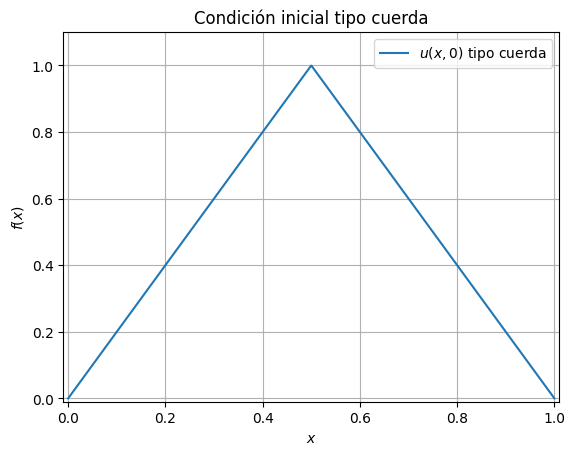

In [7]:
x = linspace(0, L, 1000)
f = cuerda(x)
#Grafica de la condicion inicial
plot(x, f, label='$u(x,0)$ tipo cuerda')
xlabel('$x$'); ylabel('$f(x)$');
title("Condición inicial tipo cuerda")
xlim([-0.01, 1.01]), ylim([-0.01, 1.1]), grid(), legend()
show()

 Serie de Fourier para la condición inicial tipo cuerda

In [8]:
def coef_a_n(n):
    return (8*k)/(n**2 * pi**2) * sin(n * pi / 2)

def u_0(x, N=20):
    f = zeros(len(x))
    for n in range(1, N):
        a_n = coef_a_n(n)
        f += a_n * sin(n * pi * x / L)
    return f

 Compararacion de la aproximación vs función original

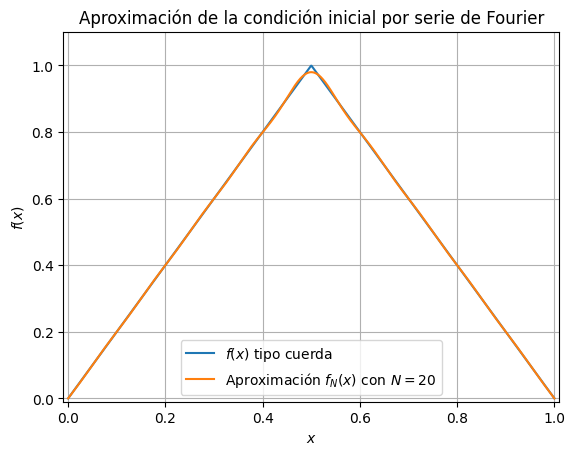

In [9]:
f_n = u_0(x, N=20)
plot(x, f, label='$f(x)$ tipo cuerda')
plot(x, f_n, label='Aproximación $f_N(x)$ con $N=20$')
xlabel('$x$'); ylabel('$f(x)$');
title("Aproximación de la condición inicial por serie de Fourier")
xlim([-0.01, 1.01]), ylim([-0.01, 1.1]), grid(), legend()
show()

Aproximaciones para diferentes cantidades de armónicos.


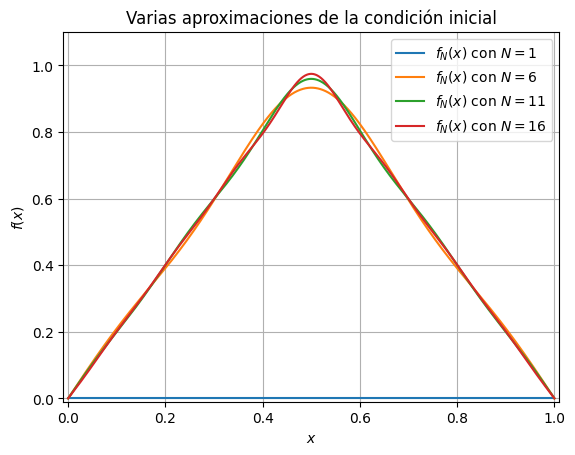

In [10]:
for i in range(1, 20, 5):
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
xlabel('$x$'); ylabel('$f(x)$');
title("Varias aproximaciones de la condición inicial")
xlim([-0.01, 1.01]), ylim([-0.01, 1.1]), grid(), legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa.


In [11]:
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            a_n = coef_a_n(n)
            f[:, i] += a_n * sin(n * pi * x / L) * cos(n * pi * c * t[i] / L)
    return f

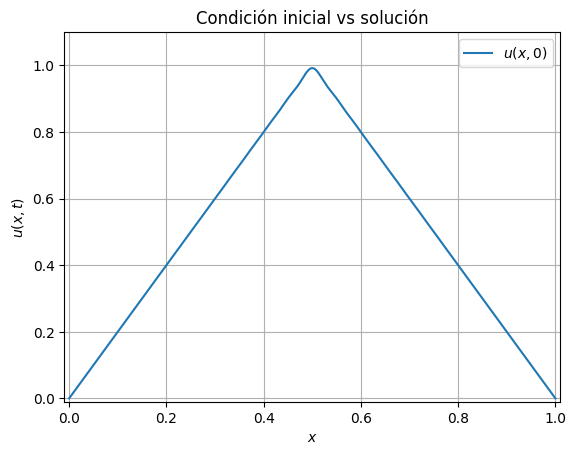

In [12]:
# Evolución de la solución con t=0
t = linspace(0, 1, 1000)
U = u_x_t(x, t)

plot(x, U[:,0], label='$u(x,0)$')
xlabel('$x$'); ylabel('$u(x,t)$')
title("Condición inicial vs solución")
xlim([-0.01, 1.01]), ylim([-0.01, 1.1]), grid(), legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

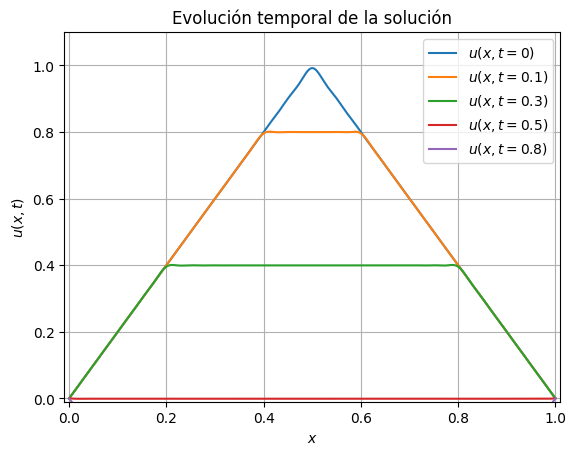

In [13]:
plot(x, U[:,0], label='$u(x, t=0)$')
plot(x, U[:,100], label='$u(x, t=0.1)$')
plot(x, U[:,300], label='$u(x, t=0.3)$')
plot(x, U[:,500], label='$u(x, t=0.5)$')
plot(x, U[:,800], label='$u(x, t=0.8)$')
xlabel('$x$'); ylabel('$u(x,t)$');
title("Evolución temporal de la solución")
xlim([-0.01, 1.01]), ylim([-0.01, 1.1]), grid(), legend()
show()

Grafica en 3D

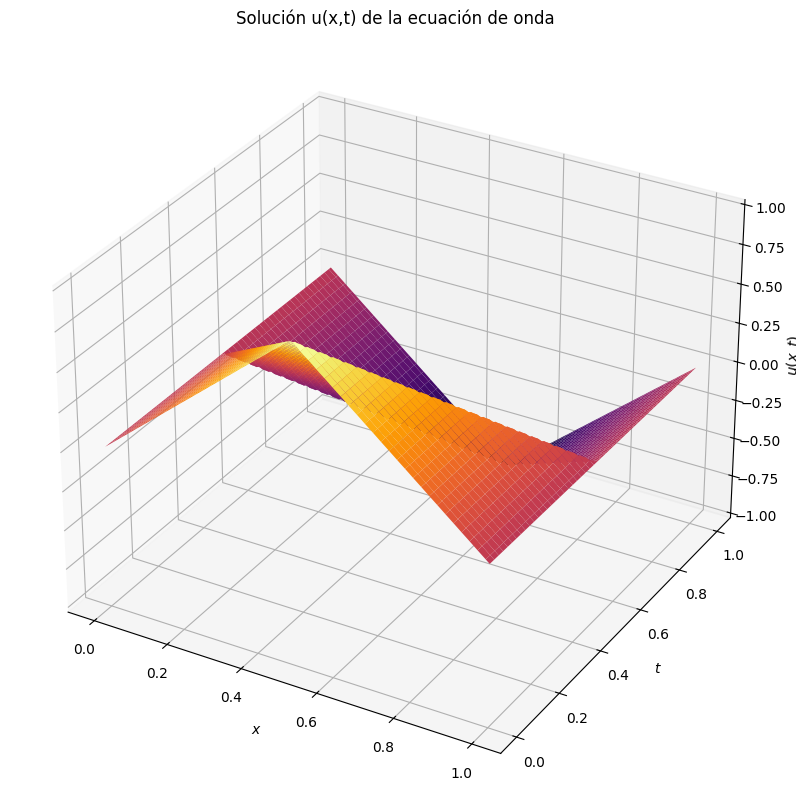

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0, 1, 100)
t = linspace(0, 1, 100)
X, T = meshgrid(x, t)
U = u_x_t(x, t)

ax.plot_surface(X, T, U.T, cmap="inferno")
xlabel('$x$'); ylabel('$t$'); ax.set_zlabel('$u(x,t)$')
title("Solución u(x,t) de la ecuación de onda")
show()